<br><b>Основная информация</b>
<br>Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже <br>продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов <br>уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность <br>постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
<br>Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы <br>увеличить их покупательскую активность.
<br><br><b>Список файлов</b>
<br>market_file.csv - Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его <br>продуктовом поведении.
<br>market_money.csv- Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего <br>потратил за период взаимодействия с сайтом.
<br>market_time.csv - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода. 
<br>money.csv - Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
    <br><b><br>Весь процесс анализа данных в рамках работы по данному проекту будет разбит на части:</b>
    <br>1) Введение
    <br>2) Загрузка данных
    <br>3) Предобработка данных
    <br>4) Исследовательский анализ
    <br>5) Объединение таблиц
    <br>6) Корреляционный анализ
    <br>7) Использование пайплайнов
    <br>8) Анализ важности признаков
    <br>9) Сегментация покупателей
    <br>10) Общий вывод


##  Введение

In [1]:
!pip install shap -q
!pip install shap --upgrade -q
!pip install seaborn -q
!pip install seaborn --upgrade -q
!pip install --upgrade scikit-learn -q

In [2]:

!pip install matplotlib -q
!pip install matplotlib --upgrade -q

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import shap
from scipy import stats as st
from sklearn.model_selection import train_test_split
from phik.report import plot_correlation_matrix

from sklearn.metrics import (
    r2_score, 
    mean_absolute_error, 
    mean_squared_error,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

In [4]:
def func_info(data): 
    display(data.describe())
    data.info()
    display(data.head(5))
    display(data.duplicated().sum())

##  Загрузка данных

In [5]:
market_file = pd.read_csv("C:/Users/user/Desktop/Projects/market_file.csv", sep=',')
market_money = pd.read_csv("C:/Users/user/Desktop/Projects/market_money.csv", sep=',')
market_time = pd.read_csv("C:/Users/user/Desktop/Projects/market_time.csv", sep=',')
money = pd.read_csv("C:/Users/user/Desktop/Projects/money.csv", sep=';',decimal=',')

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Переименовали всё, что необходимо, проверяем на дубликаты и переходим к следующему файлу 

##  Предобработка данных

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Начнём предобработу с файла market_file, воспользуемся написанной ранее функцией

In [6]:
func_info(market_file)

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


0

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Первым шагом приведём названия столбцов в порядок

In [7]:
market_file = market_file.rename(columns=
              {
               'Покупательская активность': 'покуп_активность', 
               'Тип сервиса': 'сервис', 
               'Разрешить сообщать': 'разрешить_сообщать', 
               'Маркет_актив_6_мес': 'маркет_актив_6_мес', 
               'Маркет_актив_тек_мес': 'маркет_актив_тек_мес', 
               'Длительность': 'длительность', 
               'Акционные_покупки': 'акционные_покупки', 
               'Популярная_категория': 'поп_категория', 
               'Средний_просмотр_категорий_за_визит': 'средний_просмотр_категорий_за_визит', 
               'Неоплаченные_продукты_штук_квартал': 'неоплаченные_продукты_штук_квартал', 
               'Ошибка_сервиса': 'ошибка_сервиса',
               'Страниц_за_визит': 'страниц_за_визит',
              })

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Посмотрим на уникальные значения в каждом столбце, ищем скрытые дубликаты, если такие будут, исправим

In [8]:
market_file['покуп_активность'] = market_file['покуп_активность'].replace('Снизилась', 'cнизилась')
market_file['покуп_активность'] = market_file['покуп_активность'].replace('Прежний уровень', 'без_изменений')
market_file['сервис'] = market_file['сервис'].replace('стандартт', 'стандарт')
market_file['поп_категория'] = market_file['поп_категория'].replace('Товары для детей', 'для_детей')
market_file['поп_категория'] = market_file['поп_категория'].replace('Домашний текстиль', 'текстиль')
market_file['поп_категория'] = market_file['поп_категория'].replace('Косметика и аксесуары', 'косметика_аксесуары')
market_file['поп_категория'] = market_file['поп_категория'].replace('Техника для красоты и здоровья', 'здоровье')
market_file['поп_категория'] = market_file['поп_категория'].replace('Кухонная посуда', 'посуда')
market_file['поп_категория'] = market_file['поп_категория'].replace('Мелкая бытовая техника и электроника', 'электроника')

In [9]:
market_file['поп_категория'].unique()

array(['для_детей', 'текстиль', 'косметика_аксесуары', 'здоровье',
       'посуда', 'электроника'], dtype=object)

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Переименовали всё, что необходимо, проверяем на дубликаты и переходим к следующему файлу 

In [10]:
market_file.duplicated().sum()

0

In [11]:
func_info(market_money)

,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


0

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Почему-то выручка это объект, проверим

In [12]:
for col in market_money:
 print(market_money[col].unique ())

[215348 215349 215350 ... 216645 216646 216647]
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']
[   0.  3293.1 4472.  ... 5224.6 4720.  4448.3]


In [13]:
market_money['Выручка'] = market_money['Выручка'].astype('float')

In [14]:
market_money = market_money.rename(columns=
              {
               'Выручка': 'выручка', 
               'Период': 'период', 

              })

In [15]:
func_info(market_money)

,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


0

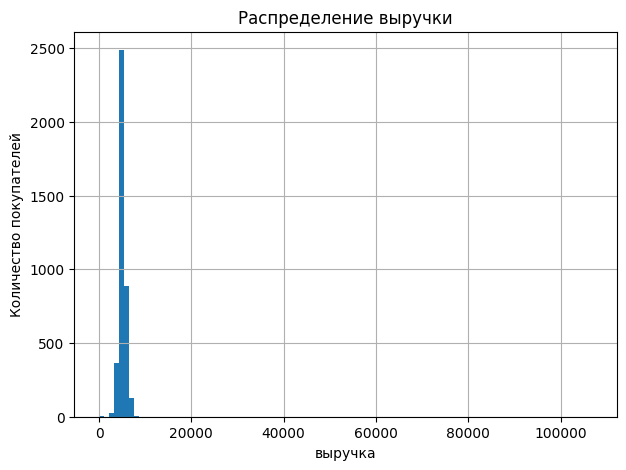

In [16]:
plt.figure(figsize=(7,5))
plt.hist(market_money.loc[(market_money['выручка'] < 120000), 'выручка'], bins = 100)
plt.title('Распределение выручки')
plt.xlabel('выручка')
plt.ylabel('Количество покупателей')
plt.grid()
plt.show()

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Посмотрим на строки с выручкой больше 50000, а потом с выручкой ноль

In [17]:
market_money[market_money['выручка'] >8000].sort_values('выручка').head(10)

,id,период,выручка
98,215380,текущий_месяц,106862.2


In [18]:
market_money[market_money['выручка'] ==0].sort_values('выручка').head(10)

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


<font size="4"><b>Комментарий студента, v1</b></font>
<br>Таких значений немного и они странные, удалим их, потом проверим наличие дубликатов и перейдём к следующему файлу

In [19]:
market_money=market_money.loc[(market_money['выручка'] < 50000)]

In [20]:
market_money=market_money.loc[(market_money['выручка'] > 0)]

In [21]:
market_money[market_money['выручка'] ==0].sort_values('выручка').head(10)

,id,период,выручка


In [22]:
market_money.duplicated().sum()

0

In [23]:
market_money=market_money.drop_duplicates()

In [24]:
market_money.duplicated().sum()

0

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Проверили наличие дубликатов, столбцы переименовали, тип данных привели в соответствие, аномальные значения также убрали 

In [25]:
func_info(market_time)

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


0

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Переименуем название столбца и значения в столбце период, для начала посмотрим все уникальные 

In [26]:
for col in market_time:
 print(market_time[col].unique())

[215348 215349 215350 ... 216645 216646 216647]
['текущий_месяц' 'предыдцщий_месяц']
[14 13 10 12  8 11  6  7  9  5 15  4 16 17 19 18 22 20 21 23]


In [27]:
market_time = market_time.rename(columns={'Период': 'период'})
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

In [28]:
for col in market_time:
 print(market_time[col].unique())

[215348 215349 215350 ... 216645 216646 216647]
['текущий_месяц' 'предыдущий_месяц']
[14 13 10 12  8 11  6  7  9  5 15  4 16 17 19 18 22 20 21 23]


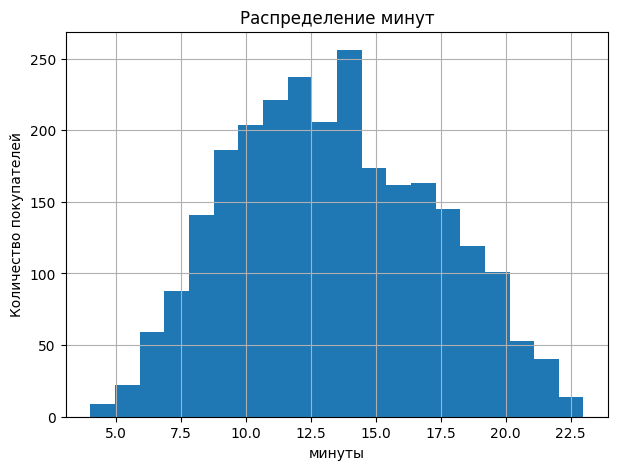

In [29]:
plt.figure(figsize=(7,5))
plt.hist(market_time.loc[(market_time['минут'] < 30), 'минут'], bins = 20)
plt.title('Распределение минут')
plt.xlabel('минуты')
plt.ylabel('Количество покупателей')
plt.grid()
plt.show()

In [30]:
market_time.duplicated().sum()

0

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Данные чуток подкорректировали, но в целом всё выглядело хорошо, перейдём к последнему файлу

In [31]:
func_info(money)

,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


0

In [32]:
for col in money:
 print(money[col].unique())

[215348 215349 215350 ... 216645 216646 216647]
[0.98 4.16 3.13 4.87 4.21 3.95 3.62 5.26 4.93 4.66 3.06 5.08 4.55 4.03
 3.49 1.83 2.67 3.65 2.95 3.03 6.27 3.86 2.82 1.4  1.63 3.69 4.08 4.18
 4.26 4.27 4.42 3.88 2.42 4.78 4.85 4.05 3.48 5.16 4.6  5.7  5.44 4.1
 2.93 3.9  3.28 5.09 3.19 4.77 5.01 6.73 7.43 4.28 3.73 3.38 3.47 5.
 2.02 3.68 2.68 4.46 2.41 5.4  3.4  4.22 4.5  4.98 3.96 3.18 4.65 3.92
 3.89 5.64 2.76 4.25 3.71 4.63 2.97 3.24 3.81 4.04 6.33 4.68 3.6  3.04
 4.41 3.98 2.47 4.52 4.01 5.31 2.53 5.83 4.48 2.98 4.92 3.08 4.9  3.94
 2.99 4.62 3.76 3.42 4.17 4.47 4.69 4.59 2.84 3.66 4.97 2.19 2.74 5.41
 4.12 3.93 5.02 3.52 3.39 6.12 4.64 3.14 4.71 4.99 3.74 4.   5.23 2.08
 6.55 2.36 4.32 3.15 2.77 5.56 3.44 3.58 2.92 4.67 3.33 2.94 1.06 2.45
 4.86 5.05 3.2  2.8  4.13 1.81 2.79 4.11 2.55 3.84 3.17 4.51 3.45 3.27
 4.2  4.33 3.01 5.79 3.12 6.59 6.88 2.7  2.69 5.49 2.34 5.25 3.25 4.74
 3.77 4.34 5.06 4.95 3.1  4.14 3.3  3.99 2.6  4.31 2.96 4.19 5.12 5.35
 4.29 4.61 2.29 4.43 5.99 5.04 3

In [33]:
money = money.rename(columns={'Прибыль': 'прибыль'})

In [34]:
for col in money:
 print(money[col].unique())

[215348 215349 215350 ... 216645 216646 216647]
[0.98 4.16 3.13 4.87 4.21 3.95 3.62 5.26 4.93 4.66 3.06 5.08 4.55 4.03
 3.49 1.83 2.67 3.65 2.95 3.03 6.27 3.86 2.82 1.4  1.63 3.69 4.08 4.18
 4.26 4.27 4.42 3.88 2.42 4.78 4.85 4.05 3.48 5.16 4.6  5.7  5.44 4.1
 2.93 3.9  3.28 5.09 3.19 4.77 5.01 6.73 7.43 4.28 3.73 3.38 3.47 5.
 2.02 3.68 2.68 4.46 2.41 5.4  3.4  4.22 4.5  4.98 3.96 3.18 4.65 3.92
 3.89 5.64 2.76 4.25 3.71 4.63 2.97 3.24 3.81 4.04 6.33 4.68 3.6  3.04
 4.41 3.98 2.47 4.52 4.01 5.31 2.53 5.83 4.48 2.98 4.92 3.08 4.9  3.94
 2.99 4.62 3.76 3.42 4.17 4.47 4.69 4.59 2.84 3.66 4.97 2.19 2.74 5.41
 4.12 3.93 5.02 3.52 3.39 6.12 4.64 3.14 4.71 4.99 3.74 4.   5.23 2.08
 6.55 2.36 4.32 3.15 2.77 5.56 3.44 3.58 2.92 4.67 3.33 2.94 1.06 2.45
 4.86 5.05 3.2  2.8  4.13 1.81 2.79 4.11 2.55 3.84 3.17 4.51 3.45 3.27
 4.2  4.33 3.01 5.79 3.12 6.59 6.88 2.7  2.69 5.49 2.34 5.25 3.25 4.74
 3.77 4.34 5.06 4.95 3.1  4.14 3.3  3.99 2.6  4.31 2.96 4.19 5.12 5.35
 4.29 4.61 2.29 4.43 5.99 5.04 3

In [35]:
money.duplicated().sum()

0

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Предобработка завершена

In [36]:
market_file['маркет_актив_6_мес'] = market_file['маркет_актив_6_мес'].astype('float')
market_file['акционные_покупки'] = market_file['акционные_покупки'].astype('float')

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Упустил эти столбцы, дальше по ходу, понял что косяк

##  Исследовательский анализ данных

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Напишем функцию для удобного просмотра гистограмм и боксплотов

In [37]:
def histogram_boxplot(data, xlabel = None, title = None, font_scale=1, figsize=(7,5), bins = None):

    sns.set(font_scale=font_scale)
    f, (ax_box, ax_hist) = plt.subplots(2,gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    sns.boxplot(data, ax=ax_box)
    sns.distplot(data, ax=ax_hist, bins=bins) if bins else sns.distplot(data, ax=ax_hist)
    if xlabel: ax_hist.set(xlabel=xlabel)
    if title: ax_box.set(title=title)
    plt.show()

In [38]:
market_file_numerics_only = market_file.select_dtypes(include=np.number)

In [39]:
market_file_numerics_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   маркет_актив_6_мес                   1300 non-null   float64
 2   маркет_актив_тек_мес                 1300 non-null   int64  
 3   длительность                         1300 non-null   int64  
 4   акционные_покупки                    1300 non-null   float64
 5   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 6   неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 7   ошибка_сервиса                       1300 non-null   int64  
 8   страниц_за_визит                     1300 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 91.5 KB


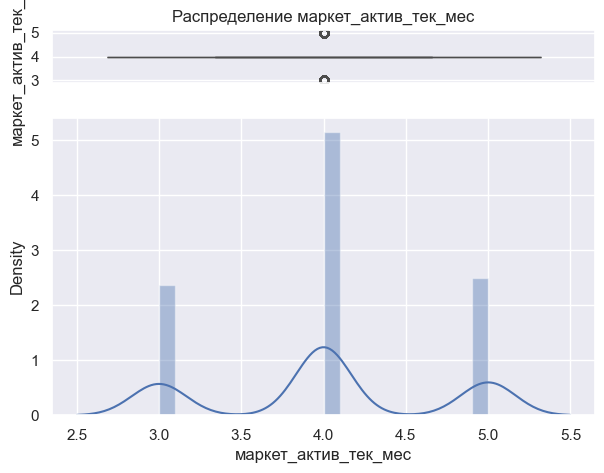

In [40]:
histogram_boxplot(market_file_numerics_only['маркет_актив_тек_мес'], bins = 20, title="Распределение маркет_актив_тек_мес", xlabel="маркет_актив_тек_мес")

In [41]:
market_file_numerics_only['маркет_актив_тек_мес'].value_counts()

маркет_актив_тек_мес
4    669
5    323
3    308
Name: count, dtype: int64

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Можно сказать, что значение распределено нормально, максимальное количество маркетинговых коммуникаций в текущем месяце = 4, значения 5 и 3 фактически идентичны, разница в пределах погрешности

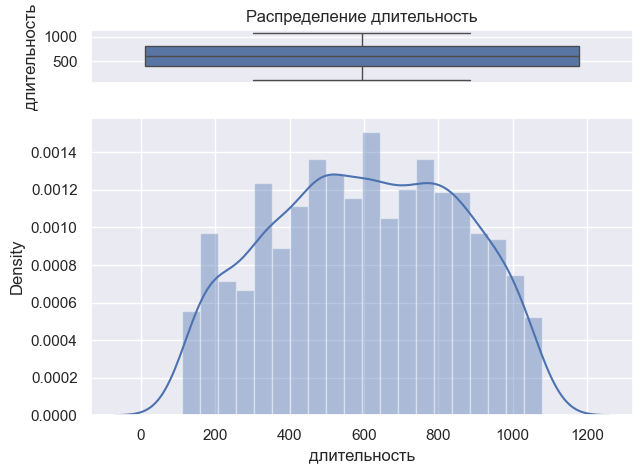

In [42]:
histogram_boxplot(market_file_numerics_only['длительность'], bins = 20, title="Распределение длительность", xlabel="длительность")

In [43]:
market_file_numerics_only['длительность'].describe()

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64

<font size="4"><b>Комментарий студента, v1</b></font>
<br>В среднем с момента регистрации покупателя на сайте прошло 600 дней, минимальное количество 110, странно, за последние 110 дней 0 регистраций? 

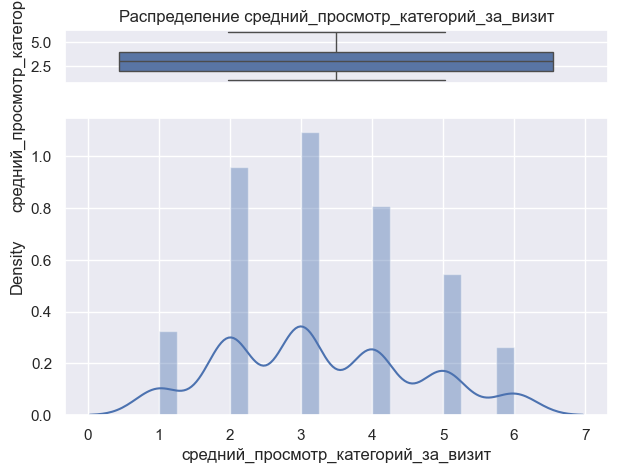

In [44]:
histogram_boxplot(market_file_numerics_only['средний_просмотр_категорий_за_визит'], bins = 20, title="Распределение средний_просмотр_категорий_за_визит", xlabel="средний_просмотр_категорий_за_визит")

In [45]:
market_file_numerics_only['средний_просмотр_категорий_за_визит'].value_counts()

средний_просмотр_категорий_за_визит
3    356
2    312
4    263
5    177
1    106
6     86
Name: count, dtype: int64

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Максимальное количество просмотренных категорий = 6, наиболее часто встречается число 3, в целом распределение около-нормальное

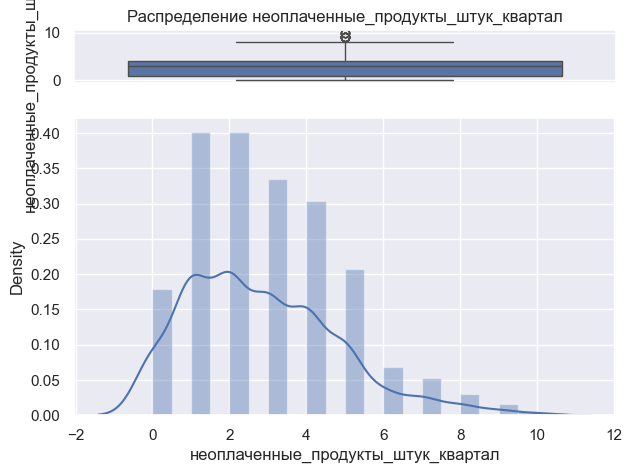

In [46]:
histogram_boxplot(market_file_numerics_only['неоплаченные_продукты_штук_квартал'], bins = 20, title="Распределение неоплаченные_продукты_штук_квартал", xlabel="неоплаченные_продукты_штук_квартал")

In [47]:
market_file_numerics_only['неоплаченные_продукты_штук_квартал'].value_counts()

неоплаченные_продукты_штук_квартал
2     261
1     261
3     218
4     197
5     135
0     116
6      44
7      34
8      20
9      10
10      4
Name: count, dtype: int64

In [48]:
market_file_numerics_only['неоплаченные_продукты_штук_квартал'].describe()

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Распределение смещено влево (похоже на логнормальное), среднее значение 2.84, максимальное 10, минимальное 1 

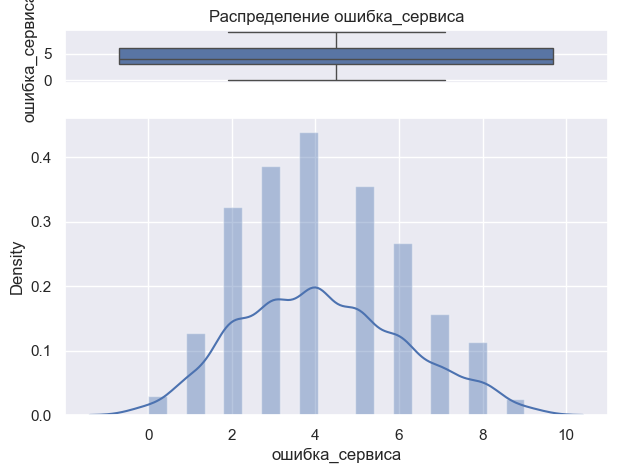

In [49]:
histogram_boxplot(market_file_numerics_only['ошибка_сервиса'], bins = 20, 
                  title="Распределение ошибка_сервиса", 
                  xlabel="ошибка_сервиса")

In [50]:
market_file_numerics_only['ошибка_сервиса'].value_counts()

ошибка_сервиса
4    257
3    226
5    208
2    189
6    156
7     92
1     74
8     66
0     17
9     15
Name: count, dtype: int64

In [51]:
market_file_numerics_only['ошибка_сервиса'].describe()

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Кому-то не очень везёт с ошибками сервиса, максимальное значение 9, среднее 4.18 

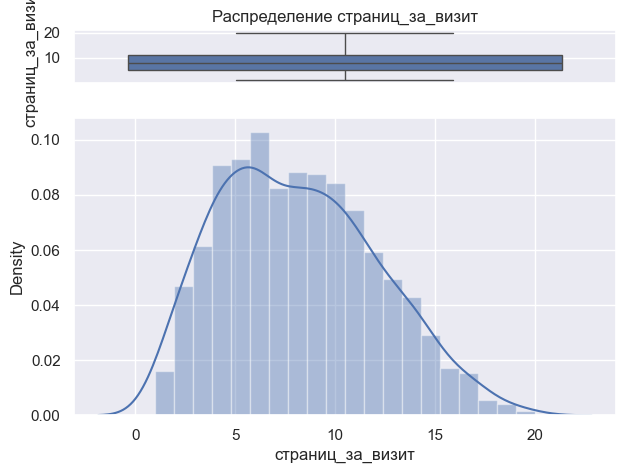

In [52]:
histogram_boxplot(market_file_numerics_only['страниц_за_визит'], bins = 20, 
                  title="Распределение страниц_за_визит", 
                  xlabel="страниц_за_визит")

In [53]:
market_file_numerics_only['страниц_за_визит'].describe()

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Максимальное количество открытых страниц 20, среднее 8.18, распределение смещено влево (напоминает логнормальное) 

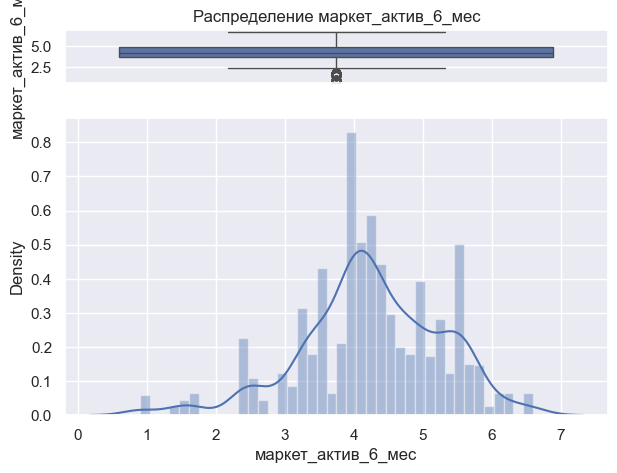

In [54]:
histogram_boxplot(market_file_numerics_only['маркет_актив_6_мес'], bins = 40, 
                  title="Распределение маркет_актив_6_мес", 
                  xlabel="маркет_актив_6_мес")

In [55]:
market_file_numerics_only['маркет_актив_6_мес'].describe()

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Среднемесячная активность за пол года лежит в диапазоне от 0.9 до 6.6, среднее значение 4.25, в диапазоне между 5-6 есть нестандартные значения

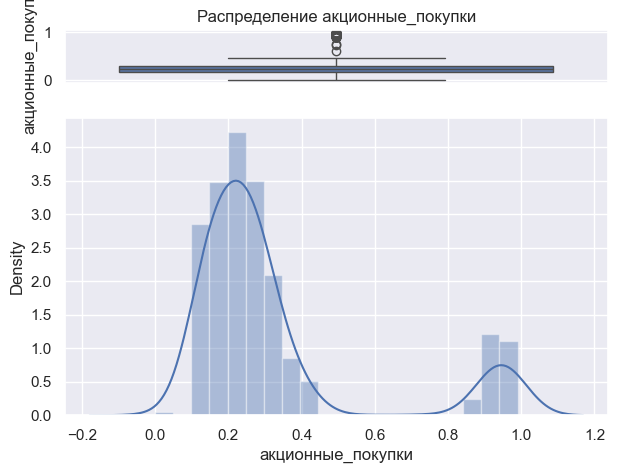

In [56]:
histogram_boxplot(market_file_numerics_only['акционные_покупки'], bins = 20, 
                  title="Распределение акционные_покупки", 
                  xlabel="акционные_покупки")

In [57]:
market_file_numerics_only['акционные_покупки'].describe()

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64

<font size="4"><b>Комментарий студента, v1</b></font>
<br>среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев имеет два купола распределения, посмотрим каждый купол отдельно

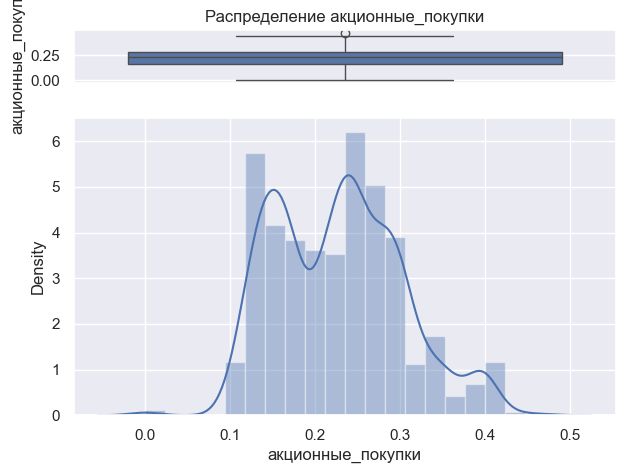

In [58]:
histogram_boxplot(market_file_numerics_only.loc[(market_file_numerics_only['акционные_покупки'] < 0.6), 'акционные_покупки'], 
                  bins = 20, 
                  title="Распределение акционные_покупки", 
                  xlabel="акционные_покупки")

In [59]:
market_file_numerics_only.loc[(market_file_numerics_only['акционные_покупки'] < 0.6),'акционные_покупки'].describe()

count    1132.000000
mean        0.227668
std         0.074984
min         0.000000
25%         0.160000
50%         0.230000
75%         0.280000
max         0.470000
Name: акционные_покупки, dtype: float64

In [60]:
market_file_numerics_only.loc[(market_file_numerics_only['акционные_покупки'] > 0.6),'акционные_покупки'].describe()

count    167.000000
mean       0.942695
std        0.038299
min        0.740000
25%        0.930000
50%        0.940000
75%        0.980000
max        0.990000
Name: акционные_покупки, dtype: float64

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Левый купол в диапазоне от 0 до 0.47, среднее значение 0.23

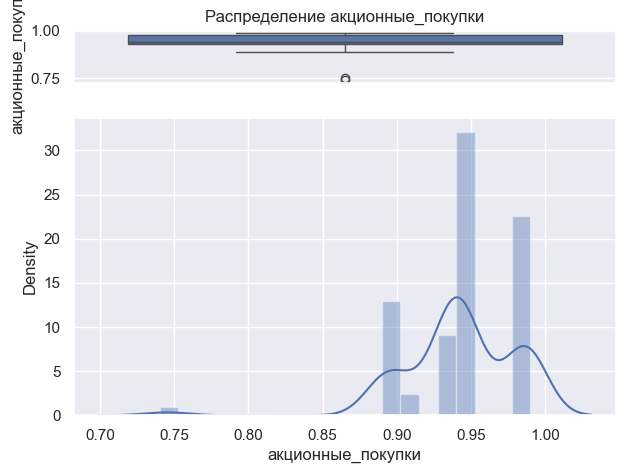

In [61]:
histogram_boxplot(market_file_numerics_only.loc[(market_file_numerics_only['акционные_покупки'] > 0.6), 'акционные_покупки'], 
                  bins = 20, 
                  title="Распределение акционные_покупки", 
                  xlabel="акционные_покупки")

In [62]:
market_file_numerics_only.loc[(market_file_numerics_only['акционные_покупки'] > 0.6),'акционные_покупки'].describe()

count    167.000000
mean       0.942695
std        0.038299
min        0.740000
25%        0.930000
50%        0.940000
75%        0.980000
max        0.990000
Name: акционные_покупки, dtype: float64

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Правый купол в диапазоне от 0.74 до 0.99, среднее значение 0.94

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Теперь посмотрим не числовые параметры

In [63]:
market_file_str_only = market_file.select_dtypes(exclude=np.number)

In [64]:
market_file_str_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   покуп_активность    1300 non-null   object
 1   сервис              1300 non-null   object
 2   разрешить_сообщать  1300 non-null   object
 3   поп_категория       1300 non-null   object
dtypes: object(4)
memory usage: 40.8+ KB


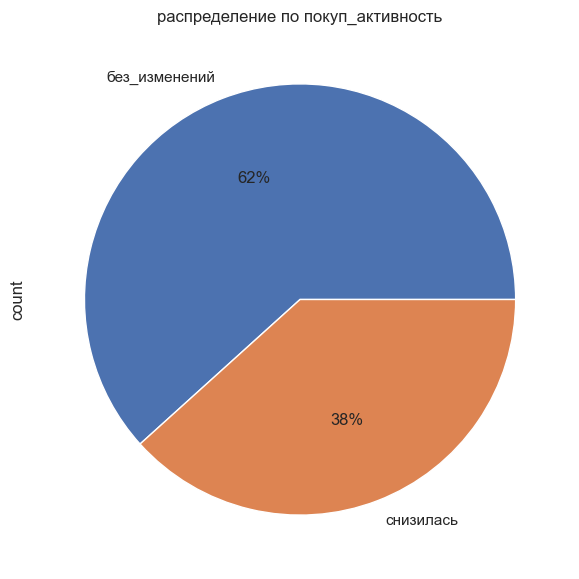

In [65]:
count=market_file_str_only['покуп_активность'].value_counts()
market_file_str_only['покуп_активность'].value_counts().plot(
        kind = 'pie', 
        y = count,
        autopct = '%1.0f%%',
        figsize=(7,7), 
        title = 'распределение по покуп_активность');

<font size="4"><b>Комментарий студента, v1</b></font>
<br>62% процента покупателей не снизили свою активность 

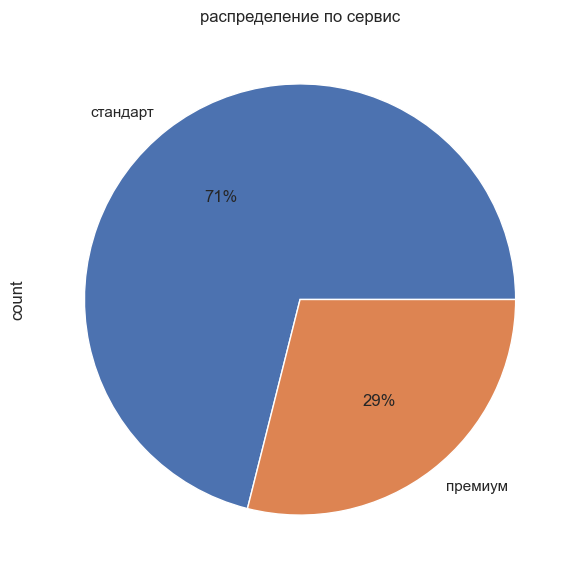

In [66]:
count=market_file_str_only['сервис'].value_counts()
market_file_str_only['сервис'].value_counts().plot(
        kind = 'pie', 
        y = count,
        autopct = '%1.0f%%',
        figsize=(7,7), 
        title = 'распределение по сервис');

<font size="4"><b>Комментарий студента, v1</b></font>
<br>71% имеют стандартный уровень сервиса

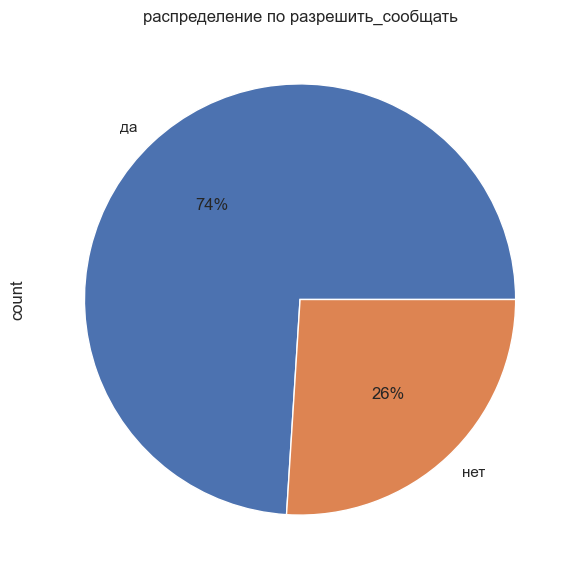

In [67]:
count=market_file_str_only['разрешить_сообщать'].value_counts()
market_file_str_only['разрешить_сообщать'].value_counts().plot(
        kind = 'pie', 
        y = count,
        autopct = '%1.0f%%',
        figsize=(7,7), 
        title = 'распределение по разрешить_сообщать');

<font size="4"><b>Комментарий студента, v1</b></font>
<br>74% разрешили делать себе рассылку 

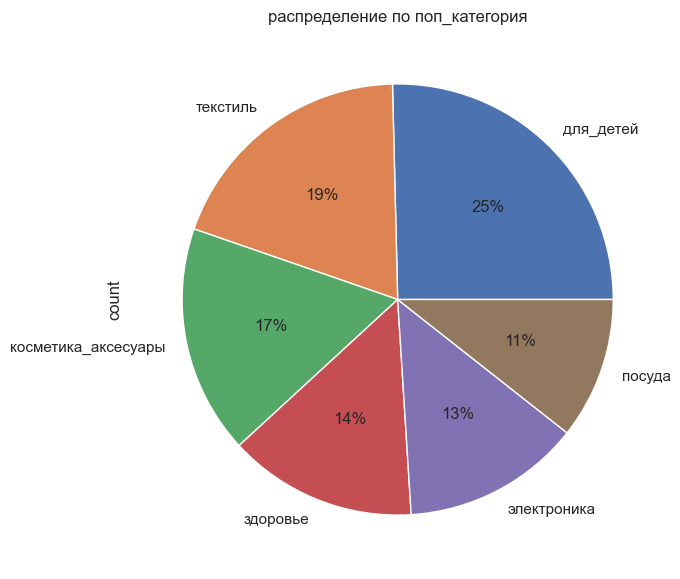

In [68]:
count=market_file_str_only['поп_категория'].value_counts()
market_file_str_only['поп_категория'].value_counts().plot(
        kind = 'pie', 
        y = count,
        autopct = '%1.0f%%',
        figsize=(7,7), 
        title = 'распределение по поп_категория');

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Самая популярная категория - для детей, на втором месте текстиль, третье - косметика

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Посмотрим на следующую таблицу

In [69]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3893 entries, 1 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3893 non-null   int64  
 1   период   3893 non-null   object 
 2   выручка  3893 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.7+ KB


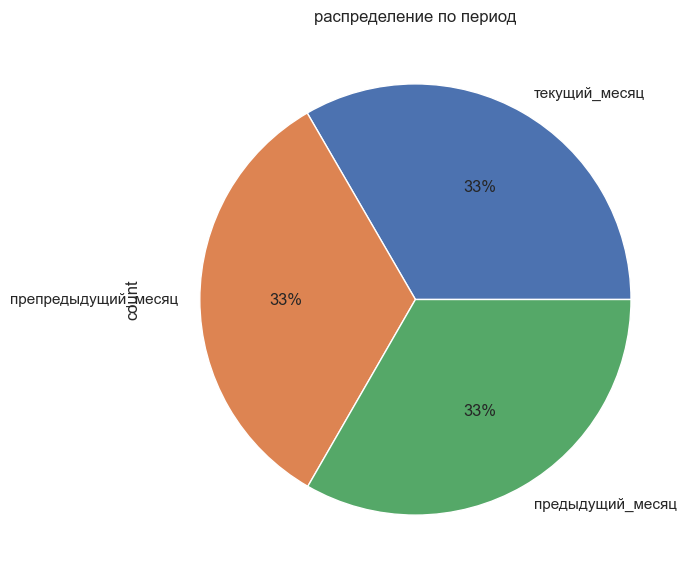

In [70]:
count=market_money['период'].value_counts()
market_money['период'].value_counts().plot(
        kind = 'pie', 
        y = count,
        autopct = '%1.0f%%',
        figsize=(7,7), 
        title = 'распределение по период');

<font size="4"><b>Комментарий студента, v1</b></font>
<br>33% по всем трём месяцам

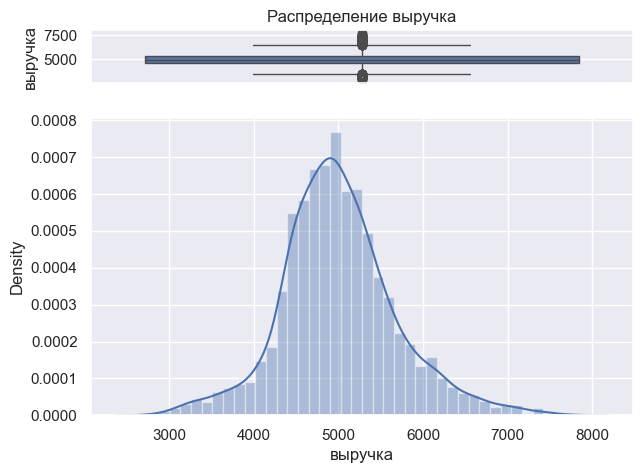

In [71]:
histogram_boxplot(market_money['выручка'], bins = 40, 
                  title="Распределение выручка", 
                  xlabel="выручка")

In [72]:
market_money['выручка'].describe()

count    3893.000000
mean     5007.282918
std       679.724898
min      2758.700000
25%      4592.000000
50%      4959.000000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Прекрасная картина, фактически идеальное распределение, максимальное значение выручки 7799, минимальное 2759,медиана 5007

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Посмотрим на следующую таблицу

In [73]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


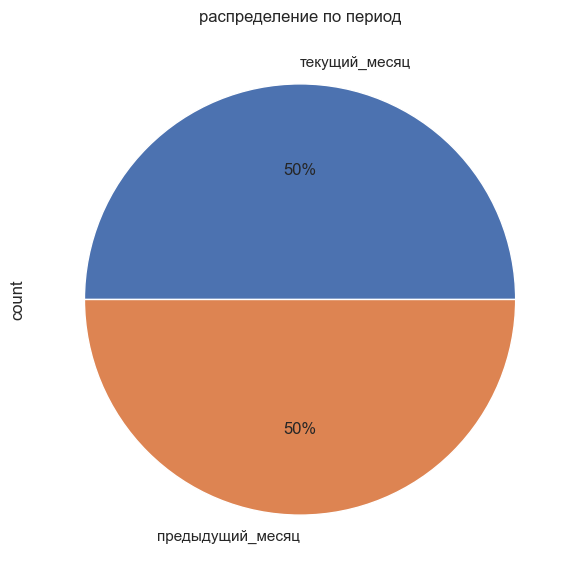

In [74]:
count=market_time['период'].value_counts()
market_time['период'].value_counts().plot(
        kind = 'pie', 
        y = count,
        autopct = '%1.0f%%',
        figsize=(7,7), 
        title = 'распределение по период');

<font size="4"><b>Комментарий студента, v1</b></font>
<br>название периода, во время которого зафиксировано общее время 50 на 50

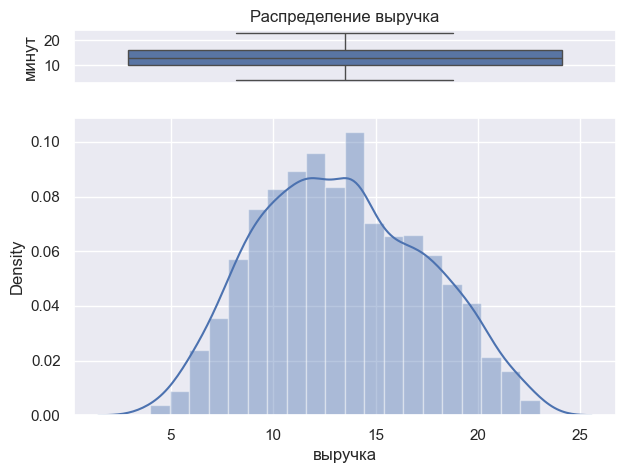

In [75]:
histogram_boxplot(market_time['минут'], bins = 20, 
                  title="Распределение выручка", 
                  xlabel="выручка")

In [76]:
market_time['минут'].describe()

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Распределение нормальное, максимальное количество минут 23, минимальное 4, среднее значение 13.3

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Рассмотрим последнюю таблицу

In [77]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [78]:
money.head(5)

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


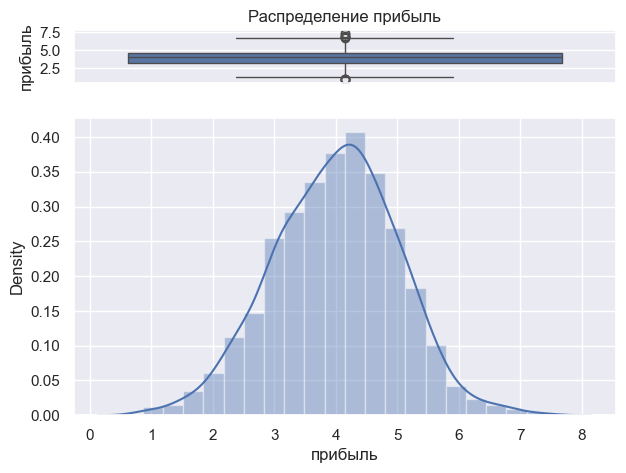

In [79]:
histogram_boxplot(money['прибыль'], bins = 20, 
                  title="Распределение прибыль", 
                  xlabel="прибыль")

In [80]:
money['прибыль'].describe()

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Максимальное значение прибыли 7.4, минимальное значение 0.9, среднее 4 

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Следующий шаг: Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Воспользуемся сводной таблицей, разобьём выручку помесячно и определим, кто ничего не купил за три месяца

In [81]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покуп_активность                     1300 non-null   object 
 2   сервис                               1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   поп_категория                        1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

In [82]:
market_file['покуп_активность'].unique()

array(['cнизилась', 'без_изменений'], dtype=object)

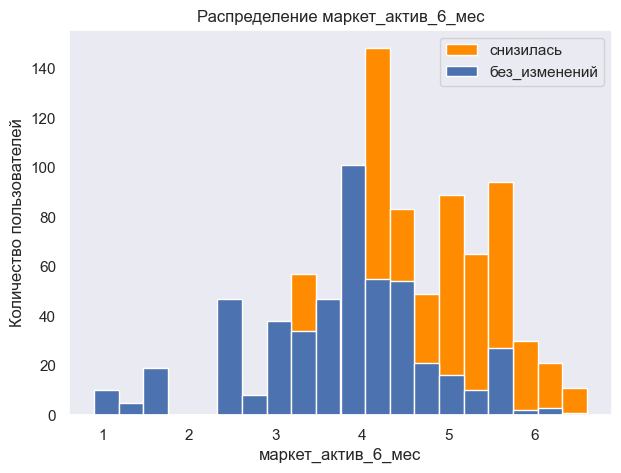

In [83]:
plt.figure(figsize=(7,5))
plt.hist(market_file.loc[(market_file['покуп_активность']=='без_изменений'), 'маркет_актив_6_мес'],color = "darkorange", bins = 20),
plt.hist(market_file.loc[(market_file['покуп_активность']=='cнизилась'), 'маркет_актив_6_мес'], bins = 20)
plt.title('Распределение маркет_актив_6_мес')
plt.xlabel('маркет_актив_6_мес')
plt.ylabel('Количество пользователей')
plt.legend(['снизилась', 'без_изменений'])
plt.grid()
plt.show()

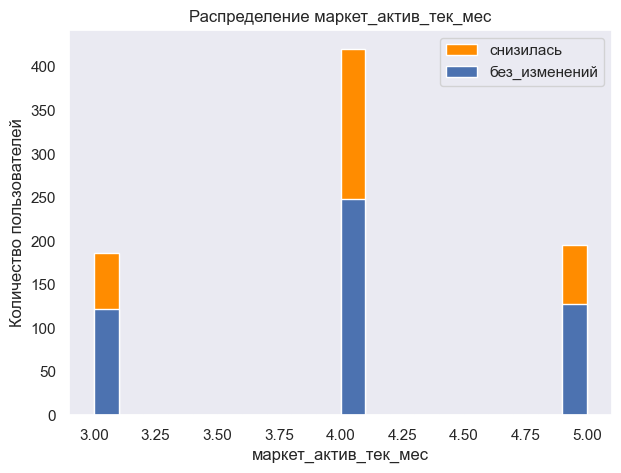

In [84]:
plt.figure(figsize=(7,5))
plt.hist(market_file.loc[(market_file['покуп_активность']=='без_изменений'), 'маркет_актив_тек_мес'],color = "darkorange", bins = 20),
plt.hist(market_file.loc[(market_file['покуп_активность']=='cнизилась'), 'маркет_актив_тек_мес'], bins = 20)
plt.title('Распределение маркет_актив_тек_мес')
plt.xlabel('маркет_актив_тек_мес')
plt.ylabel('Количество пользователей')
plt.legend(['снизилась', 'без_изменений'])
plt.grid()
plt.show()

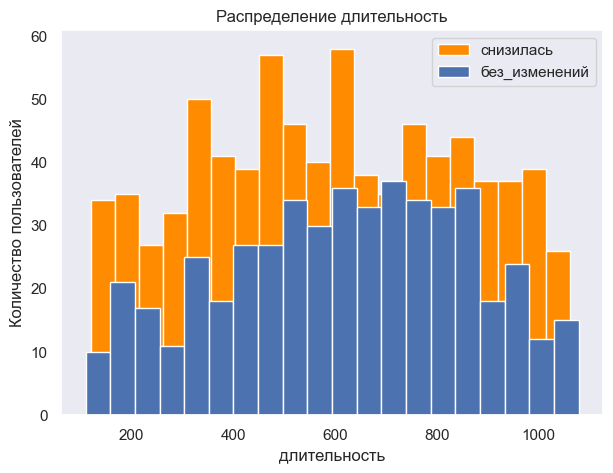

In [85]:
plt.figure(figsize=(7,5))
plt.hist(market_file.loc[(market_file['покуп_активность']=='без_изменений'), 'длительность'],color = "darkorange", bins = 20),
plt.hist(market_file.loc[(market_file['покуп_активность']=='cнизилась'), 'длительность'], bins = 20)
plt.title('Распределение длительность')
plt.xlabel('длительность')
plt.ylabel('Количество пользователей')
plt.legend(['снизилась', 'без_изменений'])
plt.grid()
plt.show()

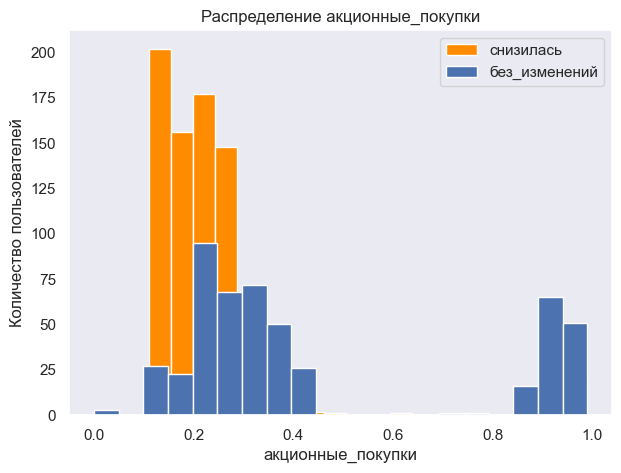

In [86]:
plt.figure(figsize=(7,5))
plt.hist(market_file.loc[(market_file['покуп_активность']=='без_изменений'), 'акционные_покупки'],color = "darkorange", bins = 20),
plt.hist(market_file.loc[(market_file['покуп_активность']=='cнизилась'), 'акционные_покупки'], bins = 20)
plt.title('Распределение акционные_покупки')
plt.xlabel('акционные_покупки')
plt.ylabel('Количество пользователей')
plt.legend(['снизилась', 'без_изменений'])
plt.grid()
plt.show()

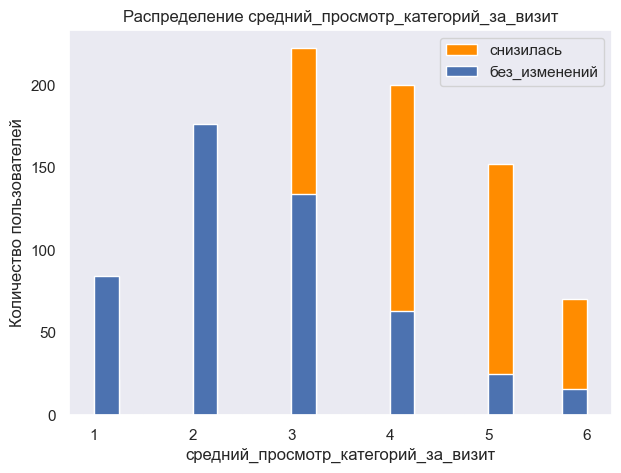

In [87]:
plt.figure(figsize=(7,5))
plt.hist(market_file.loc[(market_file['покуп_активность']=='без_изменений'), 'средний_просмотр_категорий_за_визит'],color = "darkorange", bins = 20),
plt.hist(market_file.loc[(market_file['покуп_активность']=='cнизилась'), 'средний_просмотр_категорий_за_визит'], bins = 20)
plt.title('Распределение средний_просмотр_категорий_за_визит')
plt.xlabel('средний_просмотр_категорий_за_визит')
plt.ylabel('Количество пользователей')
plt.legend(['снизилась', 'без_изменений'])
plt.grid()
plt.show()

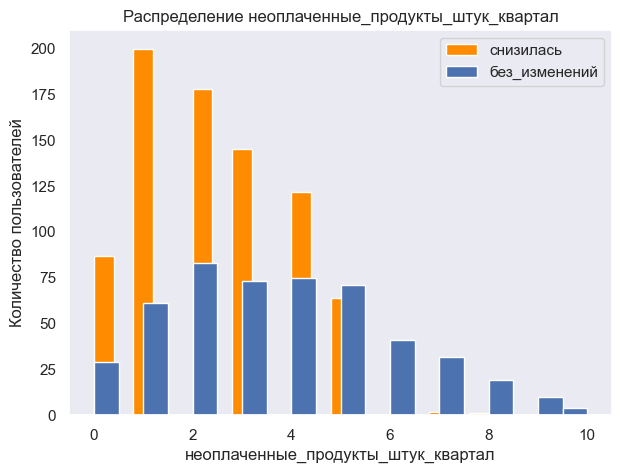

In [88]:
plt.figure(figsize=(7,5))
plt.hist(market_file.loc[(market_file['покуп_активность']=='без_изменений'), 'неоплаченные_продукты_штук_квартал'],color = "darkorange", bins = 20),
plt.hist(market_file.loc[(market_file['покуп_активность']=='cнизилась'), 'неоплаченные_продукты_штук_квартал'], bins = 20)
plt.title('Распределение неоплаченные_продукты_штук_квартал')
plt.xlabel('неоплаченные_продукты_штук_квартал')
plt.ylabel('Количество пользователей')
plt.legend(['снизилась', 'без_изменений'])
plt.grid()
plt.show()

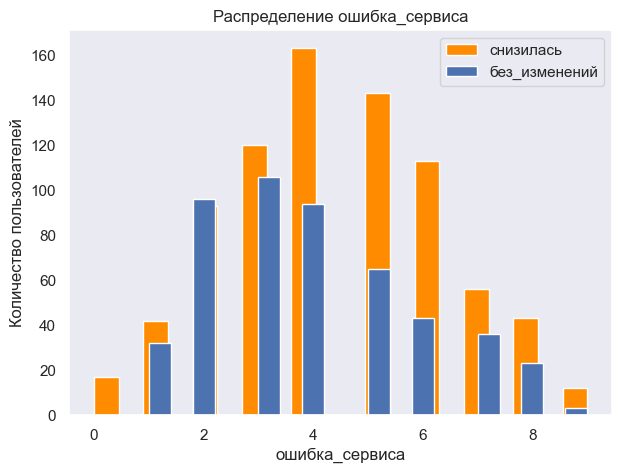

In [89]:
plt.figure(figsize=(7,5))
plt.hist(market_file.loc[(market_file['покуп_активность']=='без_изменений'), 'ошибка_сервиса'],color = "darkorange", bins = 20),
plt.hist(market_file.loc[(market_file['покуп_активность']=='cнизилась'), 'ошибка_сервиса'], bins = 20)
plt.title('Распределение ошибка_сервиса')
plt.xlabel('ошибка_сервиса')
plt.ylabel('Количество пользователей')
plt.legend(['снизилась', 'без_изменений'])
plt.grid()
plt.show()

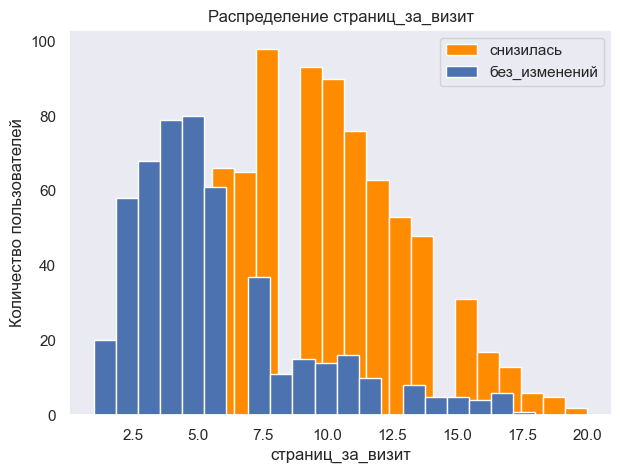

In [90]:
plt.figure(figsize=(7,5))
plt.hist(market_file.loc[(market_file['покуп_активность']=='без_изменений'), 'страниц_за_визит'],color = "darkorange", bins = 20),
plt.hist(market_file.loc[(market_file['покуп_активность']=='cнизилась'), 'страниц_за_визит'], bins = 20)
plt.title('Распределение страниц_за_визит')
plt.xlabel('страниц_за_визит')
plt.ylabel('Количество пользователей')
plt.legend(['снизилась', 'без_изменений'])
plt.grid()
plt.show()

In [91]:
market_money_pivot = pd.pivot_table(market_money, index='id', columns='период', values='выручка')

In [92]:
market_money_pivot.head(5)

период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215348,NaN,NaN,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5


In [93]:
market_money_pivot=market_money_pivot.dropna()

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Почти все клиенты покупали хоть что-то за период в три месяца (удалили 4х)

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Сделаем тоже самое и для минут (это пригодится далее по условию задачи)

In [94]:
market_time_pivot = pd.pivot_table(market_time, index='id', columns='период', values='минут')

In [95]:
market_time_pivot.head(5)

период,предыдущий_месяц,текущий_месяц
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11


In [96]:
market_time_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 215348 to 216647
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   предыдущий_месяц  1300 non-null   int64
 1   текущий_месяц     1300 non-null   int64
dtypes: int64(2)
memory usage: 30.5 KB


<font size="4"><b>Комментарий студента, v1</b></font>
<br>Нами был проведён исследовательский анализ данных, мы просмотрели все числовые и категориальные переменные,<b><br>Ниже основные выводы</b><br>:
 <br><b>маркет_актив_тек_мес</b> - Можно сказать, что значение распределено нормально, максимальное количество маркетинговых  <br>коммуникаций в текущем месяце = 4, значения 5 и 3 фактически идентичны, разница в пределах погрешности
 <br><b>длительность</b> - В среднем с момента регистрации покупателя на сайте прошло 600 дней, минимальное количество 110, <br>странно, за  последние 110 дней 0 регистраций?
 <br><b>средний_просмотр_категорий_за_визит</b> - Максимальное количество просмотренных категорий = 6, наиболее часто <br>встречается число  3, в целом распределение около-нормальное
 <br><b>неоплаченные_продукты_штук_квартал</b> - Распределение смещено влево (похоже на логнормальное), среднее значение 2.84,  <br>максимальное  10, минимальное 1
 <br><b>ошибка_сервиса</b> - Кому-то не очень везёт с ошибками сервиса, максимальное значение 9, среднее 4.18 
 <br><b>страниц_за_визит</b> - Максимальное количество открытых страниц 20, среднее 8.18, распределение смещено влево <br>(напоминает логнормальное)
 <br><b>маркет_актив_6_мес</b> - Среднемесячная активность за пол года лежит в диапазоне от 0.9 до 6.6, среднее значение 4.25, в  <br>диапазоне между 5-6 есть нестандартные значения
 <br><b>акционные_покупки</b> - среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев имеет два <br>купола распределения, посмотрим каждый купол отдельно. Левый купол в диапазоне от 0 до 0.47, среднее значение 0.23. Правый <br>купол в диапазоне от 0.74 до 0.99, среднее значение 0.94.
 <br><b>покуп_активность</b> - 62% процента покупателей не снизили свою активность 
 <br><b>сервис</b> - 71% имеют стандартный уровень сервиса
 <br><b>разрешить_сообщать</b> - 74% разрешили делать себе рассылку
 <br><b>поп_категория</b> - Самая популярная категория - для детей, на втором месте текстиль, третье - косметика
 <br><b>market_money['период']</b> - 33% по всем трём месяцам
 <br><b>market_money['выручка']</b> - Прекрасная картина, фактически идеальное распределение, максимальное значение выручки <br>7799,  минимальное 2759,медиана 5007
 <br><b>market_time['период']</b> - название периода, во время которого зафиксировано общее время 50 на 50
 <br><b>market_time['минут']</b> - Распределение нормальное, максимальное количество минут 23, минимальное 4, среднее значение <br>13.3
 <br><b>money['прибыль']</b> - Максимальное значение прибыли 7.4, минимальное значение 0.9, среднее 4 
 <br><br>Также был дан ответ на вопрос "Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, <br>которые что-либо покупали в этот период", ответ -  каждый клиент был активен как минимум в один из этих месяцев 

##  Объединение таблиц

In [97]:
market_money_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 215349 to 216647
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   предыдущий_месяц     1296 non-null   float64
 1   препредыдущий_месяц  1296 non-null   float64
 2   текущий_месяц        1296 non-null   float64
dtypes: float64(3)
memory usage: 40.5 KB


In [98]:
market_file_full=market_money_pivot.merge(market_time_pivot, on='id', how='left') 

In [99]:
market_file_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 215349 to 216647
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   предыдущий_месяц_x   1296 non-null   float64
 1   препредыдущий_месяц  1296 non-null   float64
 2   текущий_месяц_x      1296 non-null   float64
 3   предыдущий_месяц_y   1296 non-null   int64  
 4   текущий_месяц_y      1296 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 60.8 KB


In [100]:
market_file_full=market_file_full.merge(market_file, on='id', how='left') 

In [101]:
market_file_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   предыдущий_месяц_x                   1296 non-null   float64
 2   препредыдущий_месяц                  1296 non-null   float64
 3   текущий_месяц_x                      1296 non-null   float64
 4   предыдущий_месяц_y                   1296 non-null   int64  
 5   текущий_месяц_y                      1296 non-null   int64  
 6   покуп_активность                     1296 non-null   object 
 7   сервис                               1296 non-null   object 
 8   разрешить_сообщать                   1296 non-null   object 
 9   маркет_актив_6_мес                   1296 non-null   float64
 10  маркет_актив_тек_мес                 1296 non-null   int64  
 11  длительность                  

In [102]:
market_file_full.head(5)

,id,предыдущий_месяц_x,препредыдущий_месяц,текущий_месяц_x,предыдущий_месяц_y,текущий_месяц_y,покуп_активность,сервис,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,поп_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215349,5216.0,4472.0,4971.6,12,10,cнизилась,премиум,да,4.4,4,819,0.75,для_детей,4,4,2,5
1,215350,5457.5,4826.0,5058.4,8,13,cнизилась,стандарт,нет,4.9,3,539,0.14,текстиль,5,2,1,5
2,215351,6158.0,4793.0,6610.4,11,13,cнизилась,стандарт,да,3.2,5,896,0.99,для_детей,5,0,6,4
3,215352,5807.5,4594.0,5872.5,8,11,cнизилась,стандарт,нет,5.1,3,1064,0.94,для_детей,3,2,3,2
4,215353,4738.5,5124.0,5388.5,10,10,cнизилась,стандарт,да,3.3,4,762,0.26,текстиль,4,1,1,4


In [103]:
market_file_full = market_file_full.rename(columns=
              {
               'предыдущий_месяц_x': 'предыдущий_месяц_выручка', 
               'текущий_месяц_x': 'текущий_месяц_выручка', 
               'препредыдущий_месяц': 'препредыдущий_месяц_выручка', 
               'текущий_месяц_y': 'текущий_месяц_минут', 
               'предыдущий_месяц_y': 'предыдущий_месяц_минут', 
              })

In [104]:
market_file_full.head(5)

,id,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,покуп_активность,сервис,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,поп_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215349,5216.0,4472.0,4971.6,12,10,cнизилась,премиум,да,4.4,4,819,0.75,для_детей,4,4,2,5
1,215350,5457.5,4826.0,5058.4,8,13,cнизилась,стандарт,нет,4.9,3,539,0.14,текстиль,5,2,1,5
2,215351,6158.0,4793.0,6610.4,11,13,cнизилась,стандарт,да,3.2,5,896,0.99,для_детей,5,0,6,4
3,215352,5807.5,4594.0,5872.5,8,11,cнизилась,стандарт,нет,5.1,3,1064,0.94,для_детей,3,2,3,2
4,215353,4738.5,5124.0,5388.5,10,10,cнизилась,стандарт,да,3.3,4,762,0.26,текстиль,4,1,1,4


In [105]:
market_file_full.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   предыдущий_месяц_выручка             1296 non-null   float64
 2   препредыдущий_месяц_выручка          1296 non-null   float64
 3   текущий_месяц_выручка                1296 non-null   float64
 4   предыдущий_месяц_минут               1296 non-null   int64  
 5   текущий_месяц_минут                  1296 non-null   int64  
 6   покуп_активность                     1296 non-null   object 
 7   сервис                               1296 non-null   object 
 8   разрешить_сообщать                   1296 non-null   object 
 9   маркет_актив_6_мес                   1296 non-null   float64
 10  маркет_актив_тек_мес                 1296 non-null   int64  
 11  длительность                  

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Объединили таблицы, переименовали столбцы и "убили" столбец сумма, который больше не нужен и может повлиять на модель.

##  Корреляционный анализ

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Коэффициент Пирсона мы используем в случае нормальности распределения данных, ведь этот коэффициент чувствителен к <br>отклонениям от нормальности (и к выбросам кстати), что может исказить результаты анализа (в случаи ненормальности используем <br>Спирмена). В нашем случае выбросы минимальны, а данные распределены почти нормально, будем использовать Пирсона

In [106]:
market_file_full.head(5)

,id,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,покуп_активность,сервис,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,поп_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215349,5216.0,4472.0,4971.6,12,10,cнизилась,премиум,да,4.4,4,819,0.75,для_детей,4,4,2,5
1,215350,5457.5,4826.0,5058.4,8,13,cнизилась,стандарт,нет,4.9,3,539,0.14,текстиль,5,2,1,5
2,215351,6158.0,4793.0,6610.4,11,13,cнизилась,стандарт,да,3.2,5,896,0.99,для_детей,5,0,6,4
3,215352,5807.5,4594.0,5872.5,8,11,cнизилась,стандарт,нет,5.1,3,1064,0.94,для_детей,3,2,3,2
4,215353,4738.5,5124.0,5388.5,10,10,cнизилась,стандарт,да,3.3,4,762,0.26,текстиль,4,1,1,4


interval columns not set, guessing: ['id', 'предыдущий_месяц_выручка', 'препредыдущий_месяц_выручка', 'текущий_месяц_выручка', 'предыдущий_месяц_минут', 'текущий_месяц_минут', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит']


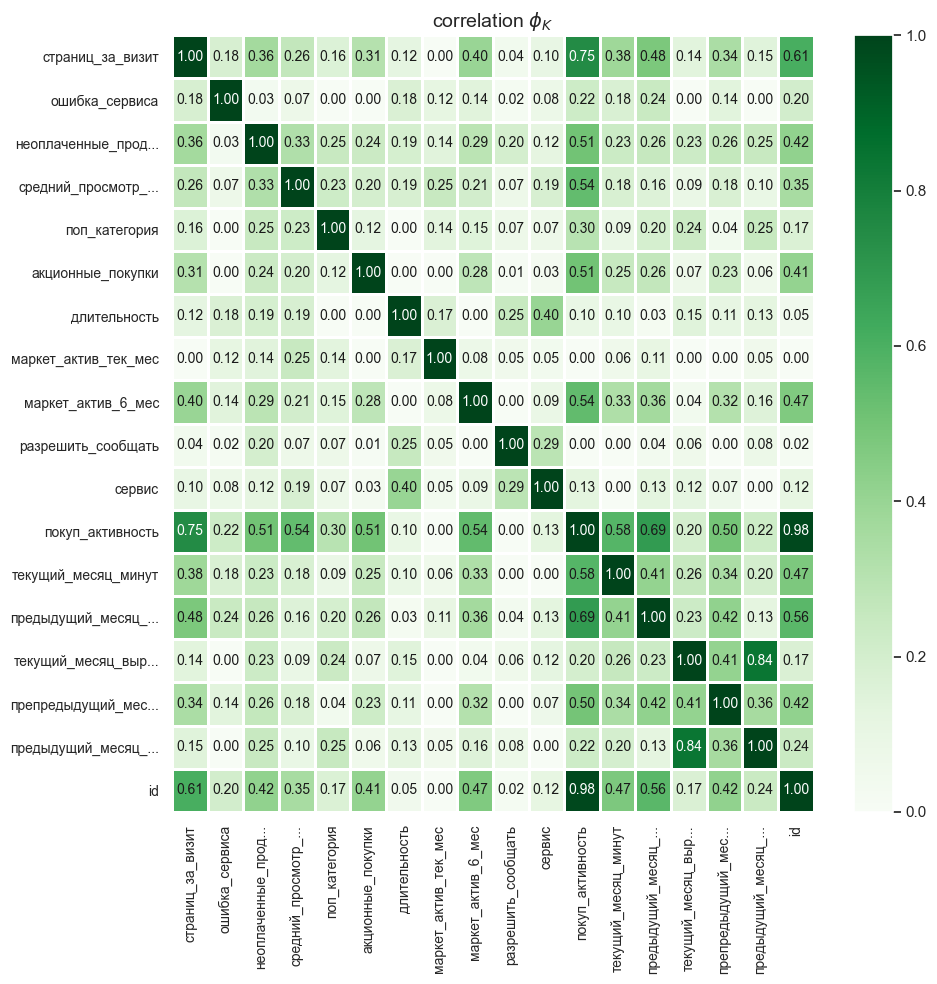

In [107]:
phik_overview = market_file_full.phik_matrix()

plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 

                        vmin=0, vmax=1, color_map='Greens', title=r'correlation $\phi_K$', fontsize_factor=1,

                        figsize=(10,10))

plt.tight_layout()

In [108]:
#sns.set(font_scale=1.15)
#plt.figure(figsize=(20,10))
#sns.heatmap(
#    market_file_full.corr(),        
#    cmap='coolwarm',
#    annot=True, 
#    vmin=-1, vmax=1); 

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Cамая высокая связь  между показателями выручки за разные месяцы (0.78), при этом границу в 0.9 данная корреляция не переходит, также, нам требуется учесть динамику продаж по месяцам, поэтому оставляем все признаки в работе, считаем, что мультиколлинеартности в данных нет.

##  Использование пайплайнов

In [109]:
market_file_full.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   предыдущий_месяц_выручка             1296 non-null   float64
 2   препредыдущий_месяц_выручка          1296 non-null   float64
 3   текущий_месяц_выручка                1296 non-null   float64
 4   предыдущий_месяц_минут               1296 non-null   int64  
 5   текущий_месяц_минут                  1296 non-null   int64  
 6   покуп_активность                     1296 non-null   object 
 7   сервис                               1296 non-null   object 
 8   разрешить_сообщать                   1296 non-null   object 
 9   маркет_актив_6_мес                   1296 non-null   float64
 10  маркет_актив_тек_мес                 1296 non-null   int64  
 11  длительность                  

In [110]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X=market_file_full.set_index('id').drop(['покуп_активность'], axis=1)
y=market_file_full['покуп_активность']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)
X_train.shape, X_test.shape

# создаём списки с названиями признаков
ohe_columns = ['разрешить_сообщать', 
               'поп_категория', 
              ]
ord_columns = ['сервис', 
              ]
num_columns = ['маркет_актив_6_мес', 
               'маркет_актив_тек_мес',
               'длительность',
               'акционные_покупки',
               'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал',
               'ошибка_сервиса',
               'страниц_за_визит',
               'предыдущий_месяц_выручка',
               'текущий_месяц_выручка',
               'предыдущий_месяц_минут',
               'текущий_месяц_минут',
               #'id',

              ]

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error'))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['премиум', 'стандарт'], 
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [111]:
X_train

,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,сервис,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,поп_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
id,,,,,,,,,,,,,,,,
215761,4252.0,5023.0,3713.8,12,18,стандарт,нет,5.7,4,565,0.14,текстиль,5,1,4,12
216625,4337.0,4949.0,5000.0,15,13,стандарт,да,3.4,5,351,0.24,посуда,5,1,6,8
215375,5253.5,4715.0,5633.1,8,9,премиум,да,3.0,4,558,0.89,для_детей,3,3,7,4
215390,4254.0,4549.0,4612.8,8,12,стандарт,да,3.1,4,152,0.33,косметика_аксесуары,6,4,2,5
215985,5388.0,5223.0,5661.0,12,11,стандарт,да,5.5,5,541,0.17,электроника,4,1,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215834,5068.5,4635.0,5574.2,15,13,премиум,да,3.8,4,629,0.14,здоровье,4,1,7,16
216092,5194.0,4678.0,5771.2,17,20,стандарт,да,4.3,5,1035,0.25,электроника,5,2,7,5
216461,4837.0,4846.0,4959.2,14,11,премиум,да,5.5,4,781,0.23,косметика_аксесуары,3,1,6,9


In [112]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 10),
        'models__max_features': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    
    
    # словарь для модели LogisticRegression()
    {
        'models': [SVC(
            random_state=RANDOM_STATE, 
            kernel='linear',
        )],
        'models__degree': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
    
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
#y_test_pred = randomized_search.predict(X_test)
#le = LabelEncoder()
#y_test_encoded = le.fit_transform(y_test)
#y_test_pred_encoded = le.transform(y_test_pred)
#print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_encoded, y_test_pred_encoded)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['разрешить_сообщать',
                                                   'поп_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                            

In [113]:
probabilities = randomized_search.predict_proba(X_test)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(y_test, probabilities_one))

Площадь ROC-кривой: 0.894475806451613


<font size="4"><b>Комментарий студента, v1</b></font>
<br>Мы обучили четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). 
<br>Для каждой из них были подобраны гиперпараметры .
<br>В качестве метрики была выбрана roc-auc, ROC-AUC — это всеохватывающая метрика качества классификации. Она учитывает <br>работу модели при всех возможных значениях порогов и поэтому не зависит от одного конкретного. 
<br>Метрика ROC_AUC была использована при подборе гиперпараметров.
<br>Был использован один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернул лучшую <br>модель.
<br>Лучшая модель LogisticRegression(C=32, penalty='l1', random_state=42,
                                    solver='liblinear'))]), метрика roc_auc лучшей модели = 0.89

##  Анализ важности признаков

In [114]:
X_train_transformed = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
X_test_transformed = pipe_final.named_steps['preprocessor'].transform(X_test)

In [115]:
get_feature_names=pipe_final.named_steps['preprocessor'].get_feature_names_out()

In [116]:
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
explainer = shap.LinearExplainer(randomized_search.best_estimator_.named_steps['models'], X_test_transformed)
shap_values=explainer(X_test_transformed)

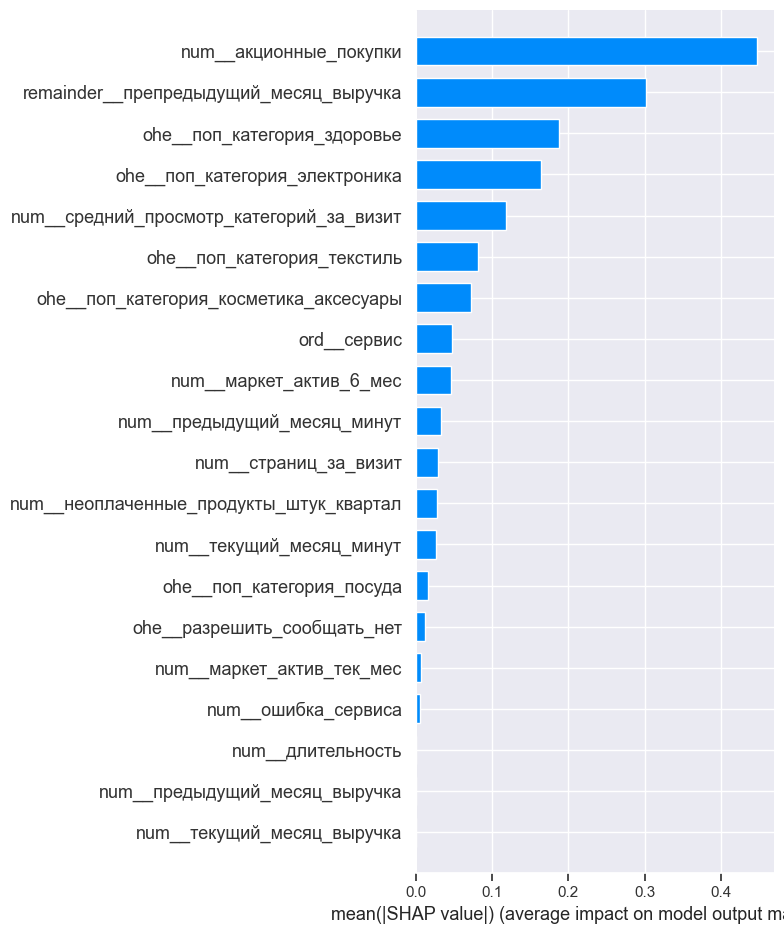

In [117]:
shap.summary_plot(shap_values, X_test_transformed, plot_type="bar",feature_names=feature_names)

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Топ 3 важных признаков - выручка за предыдущий месяц, электроника, здоровье
<br>Топ 3 не важных признаков - категория_посуда, ошибка, сервис
<br>как можно использовать эти наблюдения при моделировании и принятии бизнес-решений - можно удалить ненужные признаки из модели и сделать её предиктивную способность лучше, дополнительно к этому можно увеличить ассортимент товаров электроника и здоровье, а также подумать как увеличить продолжительность нахождения на сайте

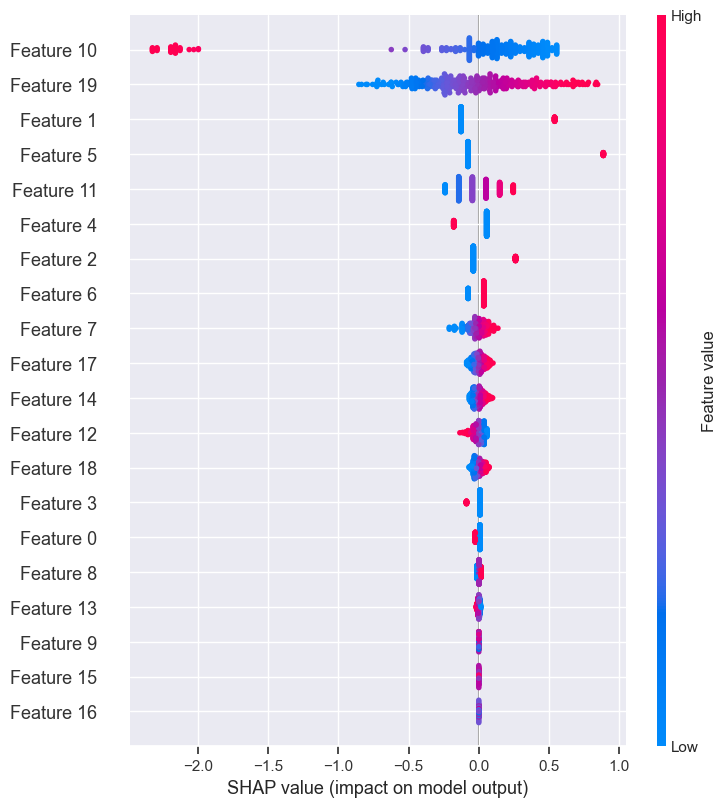

In [118]:
shap.plots.beeswarm(shap_values, max_display=22) 

##  Сегментация покупателей

In [119]:
prob = pd.DataFrame(pd.concat([
    pd.Series(randomized_search.predict_proba(X_test)[:,1]),
    pd.Series(X_test.index)
], axis=1))
prob.columns = ['вероятность_снижения_активности', 'id']
prob_money = prob.merge(money, on='id')

In [120]:
prob_money

,вероятность_снижения_активности,id,прибыль
0,0.246831,215439,6.33
1,0.894963,216575,1.82
2,0.792172,216411,3.26
3,0.966047,215893,3.16
4,0.659932,215977,4.02
...,...,...,...
319,0.997191,215989,3.71
320,0.012496,215553,3.01
321,0.335953,215451,5.31
322,0.898880,216018,3.59


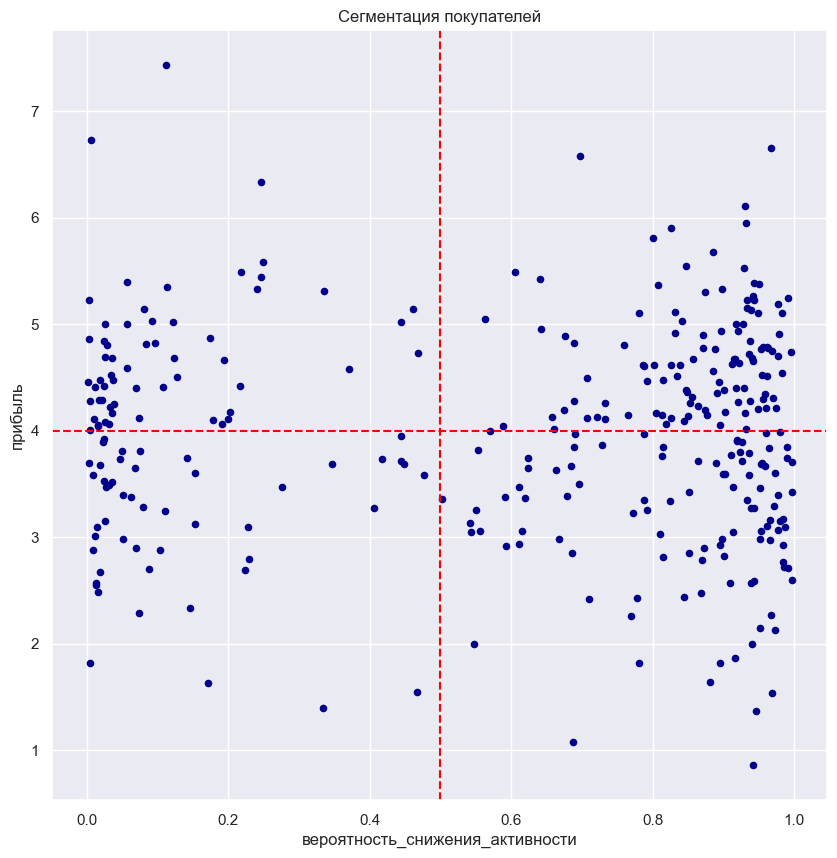

In [121]:
prob_money.plot(y='прибыль', x='вероятность_снижения_активности', kind='scatter', alpha=1,figsize=(10,10), color = 'darkblue') 
plt.title('Диаграмма рассеивания (продажи vs оценка критиков)', fontsize=20)
plt.ylabel('прибыль')
plt.xlabel('вероятность_снижения_активности')
plt.title('Сегментация покупателей')
plt.axhline (y=4, color='red', linestyle='--') 
plt.axvline (x=0.5, color='red', linestyle='--') 
plt.show()

<font size="4"><b>Комментарий студента, v1</b></font>
<br>В первую очередь нас интересуют пользователи расположенные в правом верхнем квадрате, они дают больше всего прибыли и имеют наиболее высокую вероятность её снижения

In [122]:
prob_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   вероятность_снижения_активности  324 non-null    float64
 1   id                               324 non-null    int64  
 2   прибыль                          324 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.7 KB


In [123]:
prob_money=prob_money.loc[((prob_money['вероятность_снижения_активности'] > 0.5) &(prob_money['прибыль' ] > 4))]

In [124]:
prob_money.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 4 to 323
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   вероятность_снижения_активности  111 non-null    float64
 1   id                               111 non-null    int64  
 2   прибыль                          111 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.5 KB


In [125]:
prob_money_full=prob_money.merge(market_file_full, on='id', how='left') 

In [126]:
prob_money_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   вероятность_снижения_активности      111 non-null    float64
 1   id                                   111 non-null    int64  
 2   прибыль                              111 non-null    float64
 3   предыдущий_месяц_выручка             111 non-null    float64
 4   препредыдущий_месяц_выручка          111 non-null    float64
 5   текущий_месяц_выручка                111 non-null    float64
 6   предыдущий_месяц_минут               111 non-null    int64  
 7   текущий_месяц_минут                  111 non-null    int64  
 8   покуп_активность                     111 non-null    object 
 9   сервис                               111 non-null    object 
 10  разрешить_сообщать                   111 non-null    object 
 11  маркет_актив_6_мес              

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Отфильтровали интересующих нас пользователей, посмотрим на какие категории товаров покупатели тратят больше всего и меньше всего, посмотрим как поменялись их траты за три месяца. Сделаем выводы на основе полученной информации.

In [127]:
prob_money_full['разность_выручка']=prob_money_full['препредыдущий_месяц_выручка']-prob_money_full['текущий_месяц_выручка']

In [128]:
prob_money_full['разность_выручка1']=prob_money_full['препредыдущий_месяц_выручка']-prob_money_full['предыдущий_месяц_выручка']

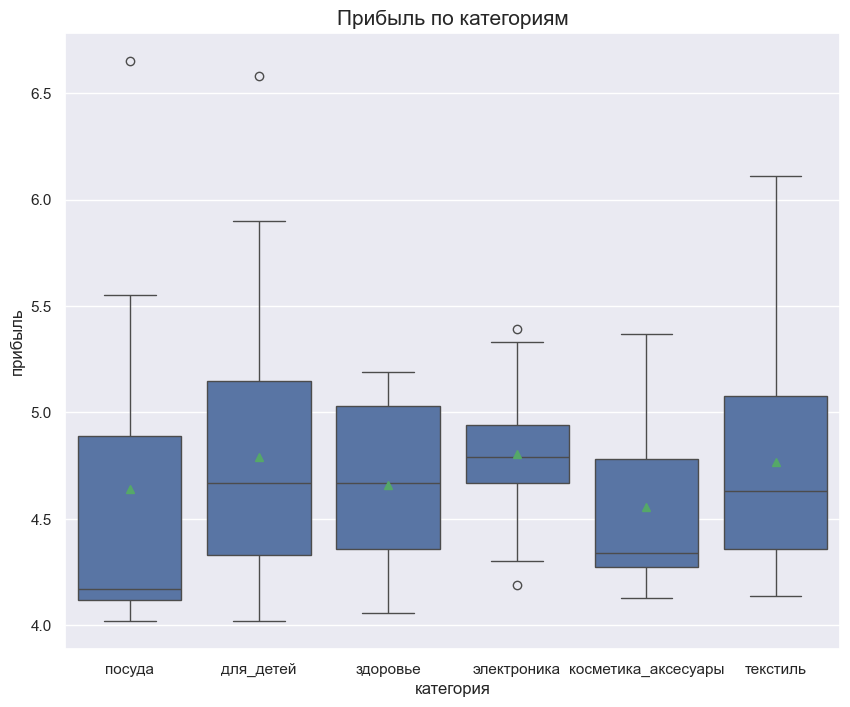

In [129]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'поп_категория', y = 'прибыль', data = prob_money_full, showfliers=True, showmeans=True)
plt.title('Прибыль по категориям', fontsize=15)
plt.xlabel('категория')
plt.ylabel('прибыль')
plt.show()

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Судя по медианному значению, больше всего прибыли даёт категория электроника, на втором месте товары для здоровья и детей

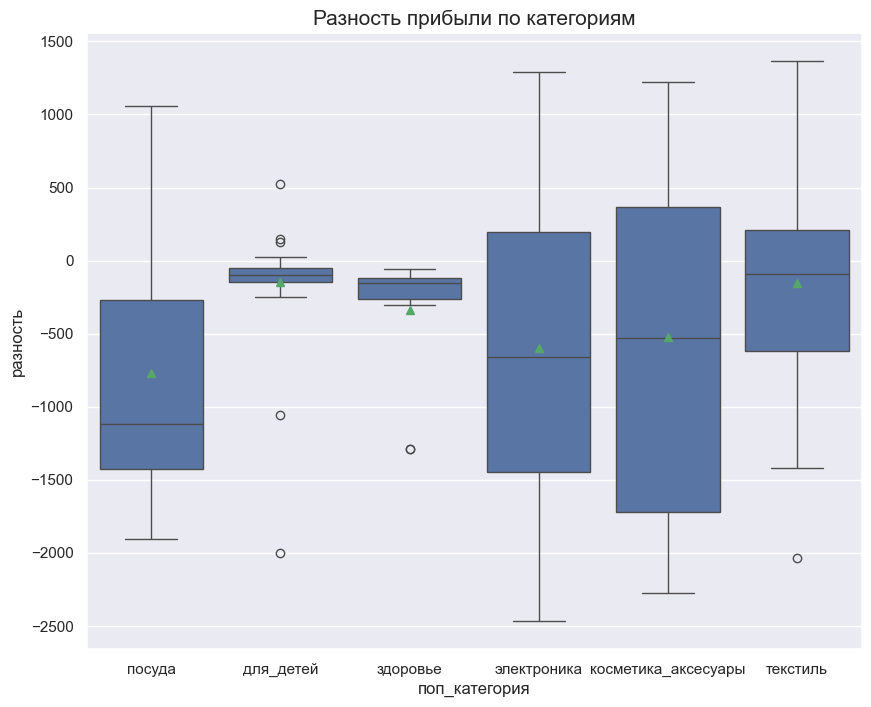

In [130]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'поп_категория', y = 'разность_выручка', data = prob_money_full, showfliers=True, showmeans=True)
plt.title('Разность прибыли по категориям', fontsize=15)
plt.xlabel('поп_категория')
plt.ylabel('разность')
plt.show()

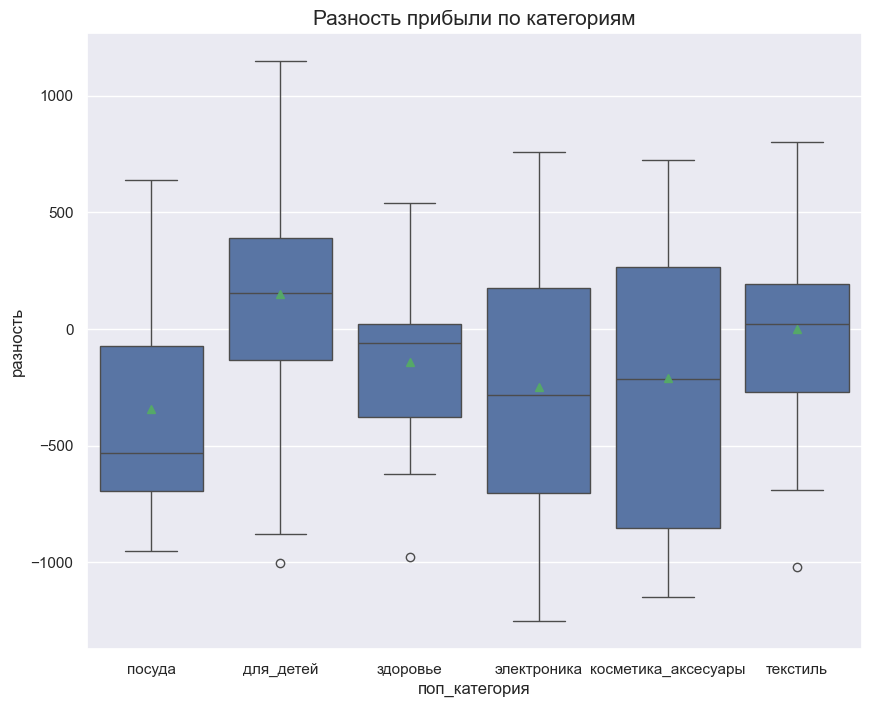

In [131]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'поп_категория', y = 'разность_выручка1', data = prob_money_full, showfliers=True, showmeans=True)
plt.title('Разность прибыли по категориям', fontsize=15)
plt.xlabel('поп_категория')
plt.ylabel('разность')
plt.show()

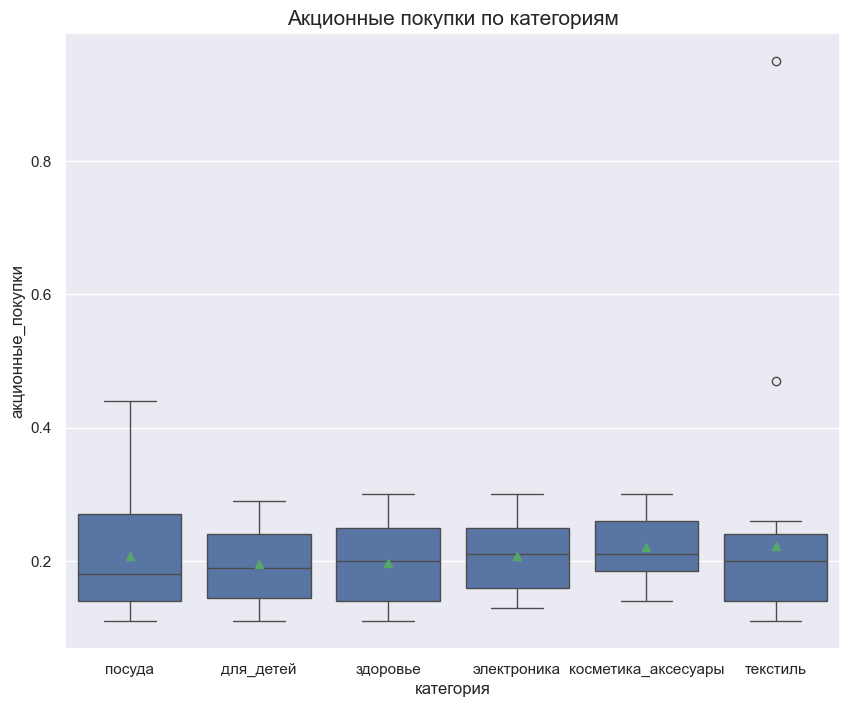

In [132]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'поп_категория', y = 'акционные_покупки', data = prob_money_full, showfliers=True, showmeans=True)
plt.title('Акционные покупки по категориям', fontsize=15)
plt.xlabel('категория')
plt.ylabel('акционные_покупки')
plt.show()

<font size="4"><b>Комментарий студента, v1</b></font>
<br>Наибольшая просадка по категориям электроника и посуда, при этом, как мы поняли ранее, посуда не самый целевой продукт.
    Наша основная рекомендация - расширить ассортимент товаров в категории электроника, возможно ввести какие-то дополнительные акции и в целом проводить более активный менеджмент в этом направлении.

##  Общий вывод

<br> Время оформить итоговые выводы.<br>
<br> <b>Основная рекомендация </b> - расширить ассортимент товаров в категории электроника, возможно ввести какие-то <br>дополнительные акции и в целом проводить более активный менеджмент в этом направлении <br> 
<br> Далее основные выводы по каждому этапу<br>
<br> <b>Предобработка</b>
<br> В рамках предобработки были переименованы названия столбов, проведена работа по поиску скрытых дубликатов, проверено 
<br> наличие аномальных значений, в целом можно говорить о том, что датафрейм содержит в себе данные высокого качества<br>
<br> <b>Исследовательский анализ данных</b>
<br> <br><b>маркет_актив_тек_мес</b> - Можно сказать, что значение распределено нормально, максимальное количество маркетинговых  <br>коммуникаций в текущем месяце = 4, значения 5 и 3 фактически идентичны, разница в пределах погрешности
 <br><b>длительность</b> - В среднем с момента регистрации покупателя на сайте прошло 600 дней, минимальное количество 110, <br>странно, за  последние 110 дней 0 регистраций?
 <br><b>средний_просмотр_категорий_за_визит</b> - Максимальное количество просмотренных категорий = 6, наиболее часто <br>встречается число  3, в целом распределение около-нормальное
 <br><b>неоплаченные_продукты_штук_квартал</b> - Распределение смещено влево (похоже на логнормальное), среднее значение 2.84,  <br>максимальное  10, минимальное 1
 <br><b>ошибка_сервиса</b> - Кому-то не очень везёт с ошибками сервиса, максимальное значение 9, среднее 4.18 
 <br><b>страниц_за_визит</b> - Максимальное количество открытых страниц 20, среднее 8.18, распределение смещено влево <br>(напоминает логнормальное)
 <br><b>маркет_актив_6_мес</b> - Среднемесячная активность за пол года лежит в диапазоне от 0.9 до 6.6, среднее значение 4.25, в  <br>диапазоне между 5-6 есть нестандартные значения
 <br><b>акционные_покупки</b> - среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев имеет два <br>купола распределения, посмотрим каждый купол отдельно. Левый купол в диапазоне от 0 до 0.47, среднее значение 0.23. Правый <br>купол в диапазоне от 0.74 до 0.99, среднее значение 0.94.
 <br><b>покуп_активность</b> - 62% процента покупателей не снизили свою активность 
 <br><b>сервис</b> - 71% имеют стандартный уровень сервиса
 <br><b>разрешить_сообщать</b> - 74% разрешили делать себе рассылку
 <br><b>поп_категория</b> - Самая популярная категория - для детей, на втором месте текстиль, третье - косметика
 <br><b>market_money['период']</b> - 33% по всем трём месяцам
 <br><b>market_money['выручка']</b> - Прекрасная картина, фактически идеальное распределение, максимальное значение выручки <br>7799,  минимальное 2759,медиана 5007
 <br><b>market_time['период']</b> - название периода, во время которого зафиксировано общее время 50 на 50
 <br><b>market_time['минут']</b> - Распределение нормальное, максимальное количество минут 23, минимальное 4, среднее значение <br>13.3
<br><b>money['прибыль']</b> - Максимальное значение прибыли 7.4, минимальное значение 0.9, среднее 4 
<br>Также был дан ответ на вопрос "Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, <br>которые что-либо покупали в этот период", ответ -  каждый клиент был активен как минимум в один из этих месяцев 
<br><b>Объединение таблиц</b>
<br>Таблицы были объединены согласно условию задачи
<br> <b>Корреляционный анализ</b>
<br>Cамая высокая связь  между показателями выручки за разные месяцы (0.78), при этом границу в 0.9 данная корреляция не <br>переходит, также, нам требуется учесть динамику продаж по месяцам, поэтому оставляем все признаки в работе, считаем, <br>что мультиколлинеартности в данных нет.
<br> <b>Использование пайплайнов</b>
<br>Мы обучили четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). 
<br>Для каждой из них были подобраны гиперпараметры .
<br>В качестве метрики была выбрана roc-auc, ROC-AUC — это всеохватывающая метрика качества классификации. Она учитывает <br>работу модели при всех возможных значениях порогов и поэтому не зависит от одного конкретного. 
<br>Метрика ROC_AUC была использована при подборе гиперпараметров.
<br>Был использован один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернул лучшую <br>модель.
<br>Лучшая модель LogisticRegression(C=32, penalty='l1', random_state=42,
                                    solver='liblinear'))]), метрика roc_auc лучшей модели = 0.9
<br> <b>Анализ важности признаков</b>
<br>Топ 3 важных признаков - выручка за предыдущий месяц, электроника, здоровье
<br>Топ 3 не важных признаков - категория_посуда, ошибка, сервис
<br>как можно использовать эти наблюдения при моделировании и принятии бизнес-решений - можно удалить ненужные признаки из модели и сделать её предиктивную способность лучше, дополнительно к этому можно увеличить ассортимент товаров электроника и здоровье, а также подумать как увеличить продолжительность нахождения на сайте  
<br> <b>Сегментация покупателей</b>
<br>Пользователи были разделены на 4 сегмента с учётом прибыли и вероятности её снижения, нас больше всего интересуют <br>пользователи в верхнем правом квадрате. Прибыль> 4 и вероятность снижения прибыли > 0.5, они были отфильрованы, дажее <br>был проведён дополнительный анализ, который позволил получить основные выводы исследования. 
   

Алохомора, сборный проект №2, который придётся сделать за два дня, сидя по ночам и заменяя кровь в организме на кофе))